In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
print(pd.__version__)
import progressbar
from tensorflow import keras 

1.2.0


### Load of the test data

In [2]:
from process import loaddata
class_data = loaddata("../data/classifier/100-high-ene.csv")

In [3]:
np.random.shuffle(class_data)
y = class_data[:,-7:-4]
x = class_data[:,1:7]

### Model Load

In [4]:
model = keras.models.load_model('../models/classificationandregression/large_mse250.h5') 

### Test of the Classification&Regression NN

In [5]:
model.fit(x, y)

2258/2258 [==============================] - 3s 976us/step - loss: 0.0220 - mae: 0.0668


### Test spectrum

A quick way of saying how well the network is doing. We reproduce the electrons final spectrum using the Neural Network's prediction and we compare it to the real "spectrum", the one obtained from OSIRIS. 

In [6]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [7]:
final_e = []
for y_ in y:
    final_e.append(np.linalg.norm(y_))

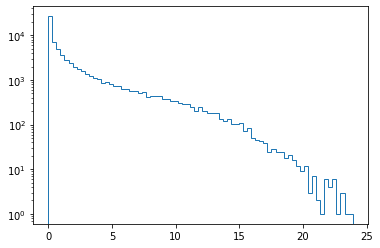

In [8]:
energy_spectrum(final_e, 75)

In [9]:
prediction = model.predict(x)


In [10]:
from tensorflow import keras 
final_e_nn = []
bar = progressbar.ProgressBar(maxval=len(prediction), 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(len(prediction))])
bar.start()
for i, pred in enumerate(prediction):
    final_e_nn.append(np.linalg.norm(pred))
    bar.update(i+1)
bar.finish()

[===============================================================] 100% of 72254


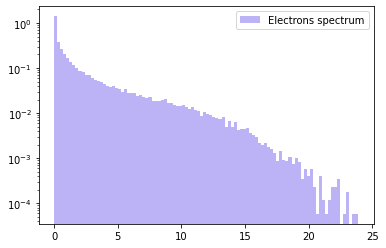

In [11]:
plt.hist(final_e, bins=100, alpha = 0.5, color = 'mediumslateblue', label='Electrons spectrum', density = True)
plt.legend(loc='upper right')
plt.yscale('log')
plt.savefig('../plots/onenetwork/highene/electronspectrum.png')
plt.savefig('../plots/onenetwork/highene/electronspectrum.pdf')
plt.show()

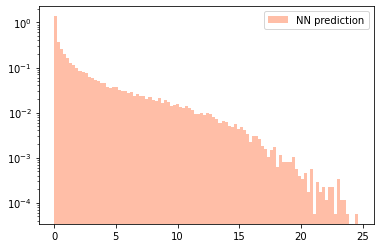

In [12]:
plt.hist(final_e_nn, bins=100, alpha = 0.5, color = 'coral', label='NN prediction', density = True)
plt.legend(loc='upper right')
plt.yscale('log')
plt.savefig('../plots/onenetwork/highene/NNprediction.png')
plt.savefig('../plots/onenetwork/highene/NNprediction.pdf')
plt.show()

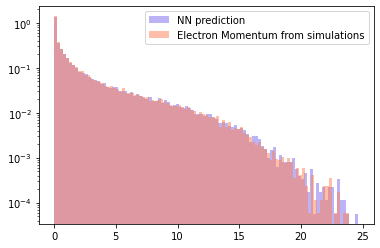

In [13]:
plt.hist(final_e_nn, bins=100, alpha = 0.5, color = 'mediumslateblue', label='NN prediction', density = True)
plt.hist(final_e, bins=100, alpha = 0.5, color = 'coral', label='Electron Momentum from simulations', density = True)
plt.legend(loc = 'upper right')
plt.yscale('log')
plt.savefig('../plots/onenetwork/highene/comparison.png')
plt.savefig('../plots/onenetwork/highene/comparison.pdf')
plt.show()